In [1]:
from numpy.random import rand
import numpy as np
import sys,os
sys.path.append(os.pardir)
from tools.models.regressors.gaussian_process_regressor import GaussianProcessRegressor

In [2]:
def generate(N,window=100,center=0 ,epsilon=1):
    x = (rand(N)-0.5) * window + center
    y = x + np.sin(x)  + epsilon*np.random.randn(N)
    return x,y

In [3]:
X,y=generate(N=10,window=30,epsilon=1)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot(X, Y, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, color="blue", marker="x")
    x = np.linspace(min(X), max(X), 100)
    y = x + np.sin(x) 
    ax.plot(x, y, color='black')

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


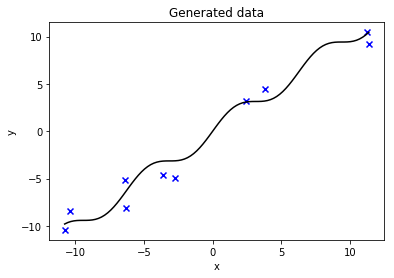

In [5]:
plot(X,y,"Generated data")

In [6]:
class GaussianKernel:
    def __init__(self,h):
        self.h = h
        
    def run(self,x,y):
        return np.exp(-np.linalg.norm(x-y)/self.h)

In [7]:
kernel=GaussianKernel(h=100)
model=GaussianProcessRegressor(kernel)

In [8]:
model.fit(X,y)

In [10]:
pred_y=model.predict(X)